In [ ]:
#default_exp data

In [ ]:
#export
from fastai.basics import *
from fastai.vision.all import *
from faststyle import *

# Data
> New image types and transforms.

In [ ]:
#export
class IncrementalSplitter:
  'Dynamically changes pct of data used without mixing train and val data'
  @delegates(RandomSplitter)
  def __init__(self, pct=1., **kwargs):
    self.pct = pct
    seed = kwargs.pop('seed', None) or random.randint(0,1e6)
    self._splitter = RandomSplitter(seed=seed, **kwargs)
    
  def __call__(self, o, **kwargs):
    tidxs, vidxs = self._splitter(o, **kwargs)
    random.shuffle(tidxs); random.shuffle(vidxs)
    return tidxs[:int(len(tidxs)*self.pct)], vidxs[:int(len(vidxs)*self.pct)]

In [ ]:
items = np.arange(1000)
splitter = IncrementalSplitter()
t1,v1 = splitter(items)
t2,v2 = splitter(items)
test_eq(set(t1), set(t2))
test_eq(set(v1), set(v2))

## New types

In [ ]:
#export
class TensorImageX(TensorImage): pass

In [ ]:
#export
class PILImageX(PILImage): pass
PILImageX._tensor_cls = TensorImageX

In [ ]:
#export
class NormalizeX(Normalize):
  def encodes(self, x:TensorImage, **kwargs): return x
  def decodes(self, x:TensorImage, **kwargs): return x
  
  def encodes(self, x:TensorImageX, **kwargs): return super().encodes(x, **kwargs)
  def decodes(self, x:TensorImageX, **kwargs): return super().decodes(x, **kwargs)

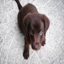

In [ ]:
img = PILImage.create(TEST_IMAGE).resize((64,64)); img

In [ ]:
t = image2tensor(img)
tim, timx = map(IntToFloatTensor(), (TensorImage(t), TensorImageX(t)))
mean,std = [.5]*3,[.5]*3
mean,std = broadcast_vec(1, 4, mean, std, cuda=False)

In [ ]:
batch_tfms = [NormalizeX(mean,std)]
tdl = TfmdDL([(timx,tim)], after_batch=batch_tfms, bs=1)

In [ ]:
x,y = tdl.one_batch()
test_close(y.mean(), tim.mean())
test_close(x.mean(), (timx.mean()-.5)/.5)

In [ ]:
#export
style_blocks = ImageBlock(PILImageX), ImageBlock()

In [ ]:
#export
class NormalizeAll(Normalize):
  def encodes(self, x:Tensor, **kwargs): return super().encodes[TensorImage](self, x, **kwargs)
  def decodes(self, x:Tensor, **kwargs): return super().decodes[TensorImage](self, x, **kwargs)

In [ ]:
batch_tfms = NormalizeAll(mean,std)
tdl = TfmdDL([(cast(tim, Tensor),tim)], after_batch=batch_tfms, bs=1)

In [ ]:
x,y = tdl.one_batch()
test_close(x,y)
test_close(x.mean(), (tim.mean()-.5)/.5)

### Weights

In [ ]:
#export
def random_weights(*size):
  x = torch.rand(*size)
  return x / x.sum()

In [ ]:
#export
class Weights(TensorBase, ShowTitle):
  _show_args = {'label': 'weights'}
  @classmethod
  def create(cls, x):  return cls(x)

### ImageWeight

In [ ]:
#export
class ImageWeight(fastuple):
  @classmethod
  def create(cls, fnw, imcls=PILImageX): return cls(imcls.create(fnw[0]), Weights(fnw[1]))
  def show(self, ctx=None, **kwargs): return show_titled_image(self, ctx=ctx, **kwargs)
ImageWeight.im, ImageWeight.ws = add_props(lambda i,x: x[i])

In [ ]:
#export
class RandomizeWeights(RandTransform):
  def encodes(self, x:Weights):
    x.data = random_weights(*x.shape)
    return x

### Visualization functions

In [ ]:
#export
@typedispatch
def show_batch(x:ImageWeight, y:TensorImage, samples, **kwargs):
  return show_batch.funcs[TensorImage][TensorImage](x, y, samples, **kwargs)

In [ ]:
#export
@typedispatch
def show_results(x:ImageWeight, y:TensorImage, samples, outs, **kwargs):
  return show_results.funcs[TensorImage][TensorImage](x, y, samples, outs, **kwargs)

### Calculates coco variance

In [ ]:
# coco = untar_data(URLs.COCO_SAMPLE)
# dset = Datasets(get_image_files(coco), tfms=[PILImage.create])
# dl = dset.dataloaders(after_item=[ToTensor(), Resize(512)], after_batch=[IntToFloatTensor()])
# c_mean = partial(torch.mean, axis=[0,2,3])
# c_std = partial(torch.std, axis=[0,2,3])
# means,stds = zip(*[(c_mean(x[0]),c_std(x[0])) for x in progress_bar(dl.train)])
# mean = torch.stack(means).mean(axis=0)
# std  = torch.stack(stds).pow(2).mean(axis=0).sqrt()

In [ ]:
#export
coco_stats = ([0.4605, 0.4101, 0.3642], [0.2780, 0.2701, 0.2741])

## Export - 

In [ ]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_layer_features.ipynb.
Converted 03_loss.ipynb.
Converted 04_models.ipynb.
Converted 05_learner.ipynb.
Converted 06_callback.ipynb.
Converted index.ipynb.
